In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

In [2]:
data = pd.read_csv("/Users/kushagrakhatwani/Downloads/voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
features = data.iloc[:,:-1];

# print(features)
le = preprocessing.LabelEncoder()
le.fit(data.label)
data['categorical_label'] = le.transform(data.label)

labels = data['categorical_label']
#print(labels)

(3168, 20)
(20, 20)
Max Eig value: 45.22
2nd largerst eig value: 11.87
(3168, 2)


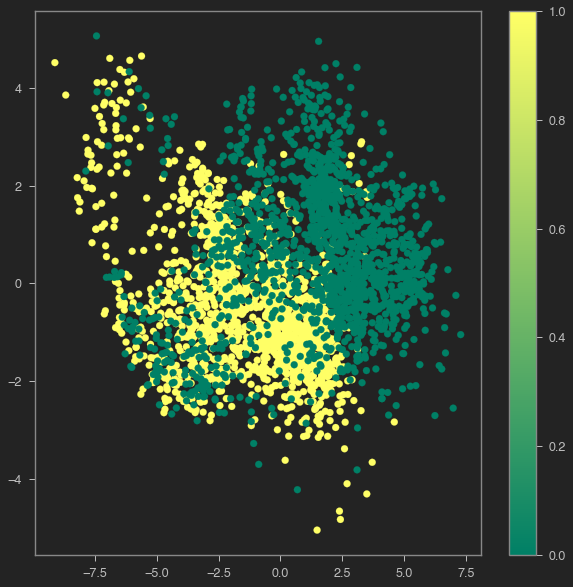

In [4]:
 features = StandardScaler().fit_transform(features)

print(features.shape)

cov = np.cov(features.T)

print(cov.shape)

eig_vals, eig_vecs = np.linalg.eig(cov)
eig_vecs = eig_vecs.T
eigen_values_sorted = np.argsort(eig_vals)
proj = np.dot(features,eig_vecs[0:2,:].T)
s = np.sum(abs(eig_vals))
print("Max Eig value:",np.around(eig_vals[0]*100/s,2))
print("2nd largerst eig value:",np.around(eig_vals[1]*100/s,2))
print(proj.shape)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0],proj[:,1],c=labels,cmap='summer');
plt.colorbar()

Max eig value: 99.99999999999974
(3168, 2)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


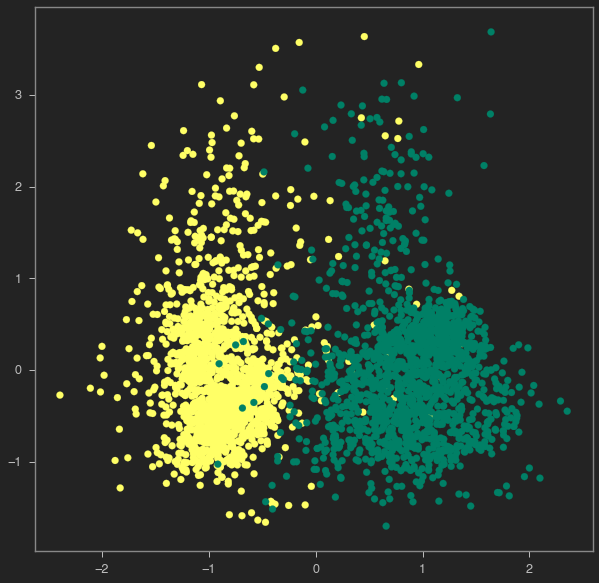

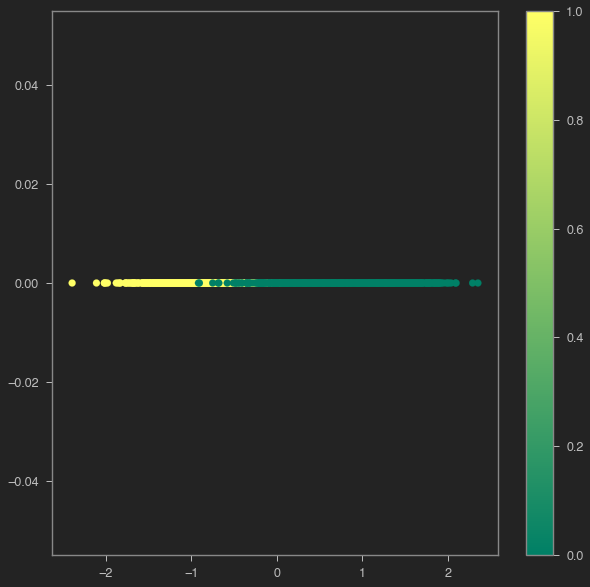

In [8]:
target_classes = np.unique(labels)
     
mean_vectors = []

for cls in target_classes:
    if target_classes.size > 1:
        mean_vectors.append(np.mean(features[labels == cls], axis=0))
    else:
        mean_vectors.append(np.mean(features, axis=0))
data_mean = np.mean(features, axis=0).reshape(1, features.shape[1])

B = np.zeros((features.shape[1], features.shape[1]))
for i, mean_vec in enumerate(mean_vectors):
    n = features[labels == i].shape[0]
    mean_vec = mean_vec.reshape(1, features.shape[1])
    mu1_mu2 = mean_vec - data_mean
    B += n * np.dot(mu1_mu2.T, mu1_mu2)
s_matrix = []

for cls, mean in enumerate(mean_vectors):
    Si = np.zeros((features.shape[1],features.shape[1]))
    for row in features[labels == cls]:
        t = (row - mean).reshape(1, features.shape[1])
        Si += np.dot(t.T, t)
    s_matrix.append(Si)
S = np.zeros((features.shape[1], features.shape[1]))
for s_i in s_matrix:
    S += s_i
S_inv = np.linalg.pinv(S)

S_inv_B = S_inv.dot(B)

eig_vals, eig_vecs = np.linalg.eig(S_inv_B)
m = np.argmax(eig_vals)
eigen_values_sorted = np.argsort(eig_vals)
max_eig = eigen_values_sorted[1]
min_eig = eigen_values_sorted[0]
projx = np.dot(features,eig_vecs[:,m])
projy = np.dot(features,eig_vecs[:,3])
s = np.sum(abs(eig_vals))
print("Max eig value:",abs((eig_vals[m]))*100/s)
print(proj.shape)
plt.figure(figsize=(10,10))
plt.scatter(projx,projy,c=labels,cmap='summer');

plt.figure(figsize=(10,10))
plt.scatter(projx,np.zeros((len(projx),1)),c=labels,cmap='summer');
plt.colorbar()

[0.45216391 0.11870609]


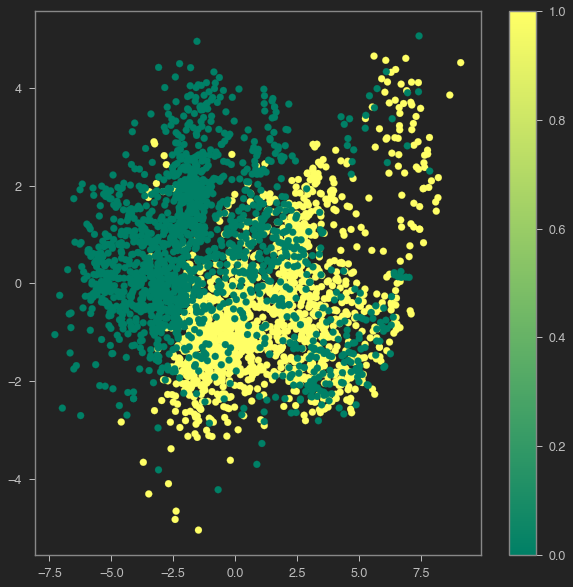

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(features)
new = pca.transform(features)
print(pca.explained_variance_ratio_)

plt.figure(figsize=(10,10))
plt.scatter(new[:,0],new[:,1],c=labels,cmap='summer')
plt.colorbar()

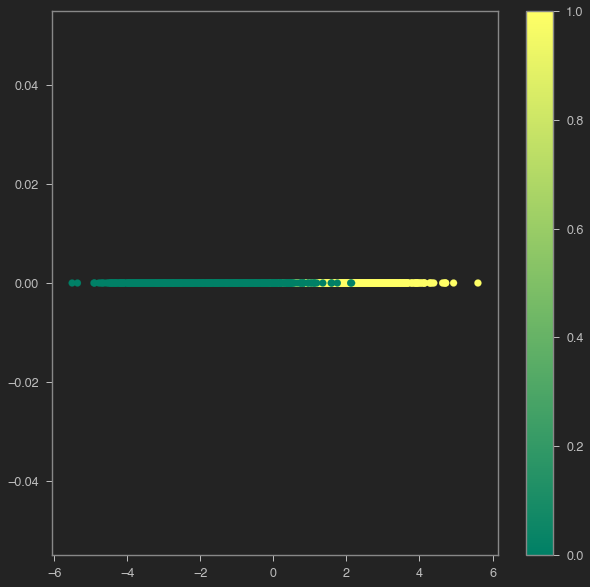

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(features, labels)

new1 = clf.transform(features)

plt.figure(figsize=(10,10))
plt.scatter(new1[:,0],np.zeros((len(new1),1)),c=labels,cmap='summer')
plt.colorbar()